# F: Cubos de imágenes

En el anterior `notebook`, el estudio de espectros de `SDSS` se basaba como hemos visto en un solo espectro por galaxia. Actualmente se realiza lo que conocemos como espectrografía *IFU (Integral Field Unit)*. Gracias a esta técnica podemos obtener un espectro de una galaxia entera, es decir, ya no solo de su centro, sino también de su estructura.

Para ello los datos `IFU` que obtenemos son cubos de imágenes, donde en dos ejes tenemos la posición de la galaxia y en un tercer eje tenemos el espectro de cada punto de la galaxia.

![](ficherosAuxiliares/the-spectral-data-cube.png)

[Fuente de la imagen](https://www.researchgate.net/figure/the-spectral-data-cube_fig3_281067250)

![](ficherosAuxiliares/data_cube.jpg)

[Fuente de la imagen](https://www.sdss.org/dr16/manga/manga-tutorials/cubes-vs-rss/)

## Datos de MaNGA (*Mapping Nearby Galaxies at APO*)

`MaNGA` es el proyecto `SDSS` más reciente que tiene como objetivo mapear la composición detallada y la estructura cinemática de 10,000 galaxias cercanas. `MaNGA` utiliza `IFUs` para poder analizar las propiedades de las galaxias

Las `IFUs` de `MaNGA` son un grupo de fibras llamadas *bundles*, en el que cada fibra individual produce un espectro. Debido a que las fibras son circulares, `MaNGA` o cualquier instrumento que utilice este tipo de fibras, necesita realizar lo que se conoce como *dithering*, esto es tomar diferentes datos realizando pequeños movimientos entre la obtención de cubos de imagenes para poder llenar los huecos que hay entre las fibras.

A partir de los datos que obtenemos para cada fibra, resueltos espacialmente através de la posición del objeto (`RA` / `Dec`), podemos generar una imagen en la parte del espectro que queramos.

## Galaxia 024837.58-003315.4

Abrimos el cubo como si de una imagen se tratase

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import glob
import matplotlib.pyplot as plt
import numpy as np

fileList = sorted(glob.glob('imagenes/cubo/*'))
print ('Number of cubes in dir:', len(fileList))
fileList[0]
hdul = fits.open(fileList[0])

data = hdul[1].data
header = hdul[1].header
wcs_cube = WCS(header)

y_center, x_center = int(header['CRPIX1']), int(header['CRPIX2'])

Number of cubes in dir: 1


a string value was expected. [astropy.wcs.wcs]


In [2]:
header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   74 /                                                
NAXIS2  =                   74 /                                                
NAXIS3  =                 4563 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>' /     
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

Text(0, 0.5, 'Flujo [1E-17 erg/s/cm^2/Ang/spaxel]')

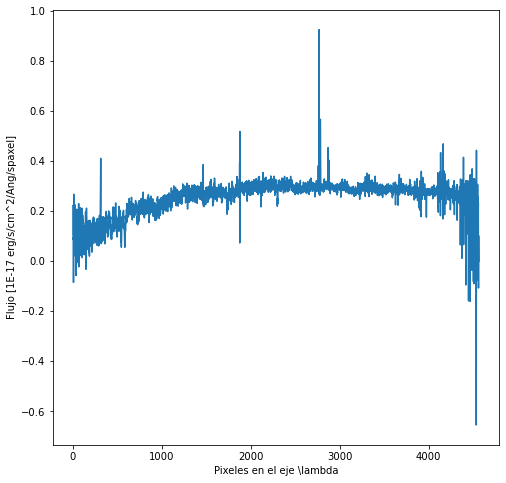

In [3]:
plt.figure(figsize=(8, 8))
plt.plot(hdul[1].data[:, y_center ,x_center]) 
plt.xlabel(r'Pixeles en el eje \lambda')
plt.ylabel(f"Flujo [{header['BUNIT']}]")

Para convertir nuestro eje x en longitud de onda deberemos tener en cuenta los valores de `CRVAL3`, `CRPIX3` y `CRDEL3`, es decir los del tercer eje que se corresponde a la longitud de onda.

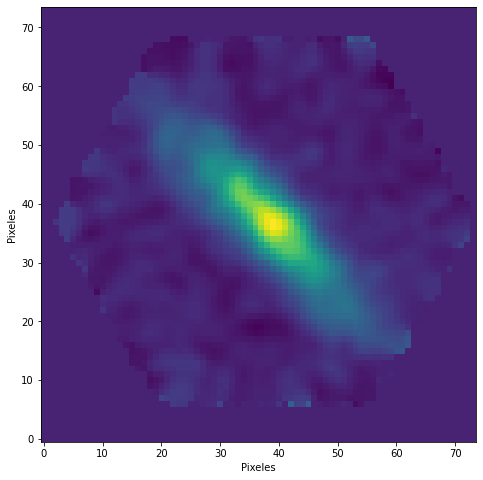

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(hdul[1].data[2500, :, :], origin='lower') 
plt.xlabel('Pixeles')
plt.ylabel("Pixeles")
plt.show()